# Data Preparation for Machine Learning (7-Day Mini-Course)

by Jason Brownlee - [Reference](https://machinelearningmastery.com/data-preparation-for-machine-learning-7-day-mini-course/)- June 29, 2020 in [Data Preparation](https://machinelearningmastery.com/category/data-preparation/)

## Crash-Course Overview
Below is a list of the seven lessons that will get you started and productive with data preparation in Python:

- Lesson 01: Importance of Data Preparation
- Lesson 02: Fill Missing Values With Imputation
- Lesson 03: Select Features With RFE
- Lesson 04: Scale 'Numerical' Data With Normalization
- Lesson 05: Transform 'Categories' With One-Hot Encoding
- Lesson 06: Transform 'Numbers' to 'Categories' With kBins
- Lesson 07: Dimensionality Reduction with PCA

## Lesson 01: Importance of Data Preparation
In this lesson, you will discover the importance of data preparation in predictive modeling with machine learning.

On a predictive modeling project, such as classification or regression, `raw data` typically cannot be used directly.

There are four main reasons why this is the case:

- `Data Types`: Machine learning algorithms *`require data to be numbers`*.
- `Data Requirements`: Some machine learning algorithms impose requirements on the data.
- `Data Errors`: Statistical *`noise`* and *`errors`* in the data may need to be corrected.
- `Data Complexity`: Complex nonlinear relationships may be teased out of the data.

There are common or standard tasks that you may use or explore during the data preparation step in a machine learning project.

These tasks include:

- `Data Cleaning`: Identifying and correcting mistakes or errors in the data.
- `Feature Selection`: Identifying those input variables that are most relevant to the task.
- `Data Transforms`: Changing the scale or distribution of variables.
- `Feature Engineering`: Deriving new variables from available data.
- `Dimensionality Reduction`: Creating compact projections of the data.

## Lesson 02: Fill Missing Values With Imputation
Data: [Horse Colic Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv)

Will discover how to identify and fill missing values in data.

Filling missing values with data is called `*data imputation*` and a popular approach for data imputation is to `*calculate a statistical*` value for each column (such as a mean) and replace all missing values for that column with the statistic.

1. [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)

In [1]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

# load dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
horsedata = '..//..//data/horse-colic.csv'
dataframe = read_csv(horsedata, header=None, na_values='?')
dataframe.shape

(300, 28)

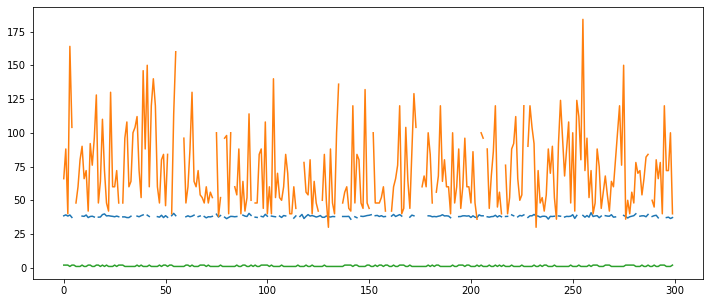

In [2]:
rcParams['figure.figsize'] = 12, 5
plt.plot(dataframe.values[:,3])
plt.plot(dataframe.values[:,4])
plt.plot(dataframe.values[:,23])
plt.show()

In [3]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


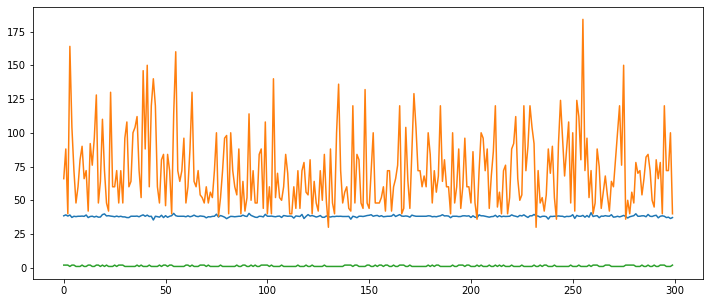

In [4]:
plt.plot(Xtrans[:,3]) # plot column 3
plt.plot(Xtrans[:,4]) # plot column 4
plt.plot(dataframe.values[:,23])
plt.show()

## Lesson 03: Select Features With RFE
Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both `reduce the computational cost` of modeling and, in some cases, to `improve the performance` of the model.

Recursive Feature Elimination, or RFE for short, is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

- 1. Generate a random n-class classification problem [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).
- 2. Feature ranking with recursive feature elimination [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [5]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


In [6]:
print(rfe.ranking_)
print(rfe.support_)

[4 5 1 1 1 6 1 2 1 3]
[False False  True  True  True False  True False  True False]


## Lesson 04: Scale 'Numerical' Data With Normalization

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

This includes algorithms that use a **weighted sum** of the input, like `linear regression`, and algorithms that use **distance measures**, like `k-nearest neighbors`.

One of the most popular techniques for scaling numerical data prior to modeling is normalization. **Normalization scales** `each input variable separately to the range 0-1`, which is the range for floating-point values where we have the most precision. It requires that you know or are able to accurately estimate the minimum and maximum observable values for each variable. You may be able to estimate these values from your available data.

In [7]:
# example of normalizing input data
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)

df = pd.DataFrame(X)
#df.info()
#df.head(5)
df.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.019956,0.467720,-0.555718,1.003868,-0.518019
std,1.420545,1.558385,1.627146,1.535056,1.602038
min,-3.554258,-6.016746,-4.921054,-3.896057,-4.973566
25%,-1.068737,-0.329898,-1.685522,-0.000439,-1.657853
50%,-0.093996,0.681331,-0.515373,1.037245,-0.578766
75%,1.106043,1.505853,0.591245,2.041581,0.425395
max,4.109214,3.988971,4.053637,5.994384,5.089334


In [8]:
# summarize data before the transform
# print(X[:3, :])

# define the scaler
trans = MinMaxScaler()

# transform the data
X_norm = trans.fit_transform(X)

# summarize data after the transform
# print(X_norm[:3, :])
df = pd.DataFrame(X_norm)
#df.info()
#df.head(5)
df.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.466396,0.648076,0.486405,0.495420,0.442770
std,0.185366,0.155749,0.181304,0.155206,0.159202
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324334,0.568360,0.360517,0.393877,0.329499
50%,0.451527,0.669425,0.490901,0.498795,0.436733
75%,0.608119,0.751830,0.614205,0.600341,0.536521
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Lesson 05: Transform 'Categories' With One-Hot Encoding

- **Categorical data** are variables that contain label values rather than numeric values.

Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

One of the most popular techniques for transforming categorical variables into numbers is the one-hot encoding.

Each label for a **categorical variable can be mapped to a unique integer**, called an `ordinal encoding`. __Then, a one-hot encoding can be applied to the ordinal representation__ `This is where one new binary variable is added to the dataset for each unique integer value in the variable, and the original categorical variable is removed from the dataset`.

For example, imagine we have a “color” variable with three categories (‘red‘, ‘green‘, and ‘blue‘). In this case, three binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

For example:

- |red|green|blue|
- |---|---|---|
- |1|0|0|
- |0|1|0|
- |0|0|1|


In [9]:
# one-hot encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import OneHotEncoder

# define the location of the dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
datafile = '..\\..\\data\\breast-cancer.csv'

# load the dataset
dataset = read_csv(datafile, header=None)

dataset.head(10)

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
5,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'
6,'50-59','ge40','40-44','0-2','no','3','left','left_up','no','no-recurrence-events'
7,'40-49','premeno','10-14','0-2','no','2','left','left_up','no','no-recurrence-events'
8,'40-49','premeno','0-4','0-2','no','2','right','right_low','no','no-recurrence-events'
9,'40-49','ge40','40-44','15-17','yes','2','right','left_up','yes','no-recurrence-events'


In [10]:
# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# summarize the raw data
print(X[:3,:])
print(y[0:6])

[["'40-49'" "'premeno'" "'15-19'" "'0-2'" "'yes'" "'3'" "'right'"
  "'left_up'" "'no'"]
 ["'50-59'" "'ge40'" "'15-19'" "'0-2'" "'no'" "'1'" "'right'" "'central'"
  "'no'"]
 ["'50-59'" "'ge40'" "'35-39'" "'0-2'" "'no'" "'2'" "'left'" "'left_low'"
  "'no'"]]
["'recurrence-events'" "'no-recurrence-events'" "'recurrence-events'"
 "'no-recurrence-events'" "'recurrence-events'" "'no-recurrence-events'"]


In [11]:
# define the one hot encoding transform
encoder = OneHotEncoder(sparse=False)

# fit and apply the transform to the input data
X_oe = encoder.fit_transform(X)

In [12]:
# summarize the transformed data
print(X_oe[:3, :])
print(y[0:6])

[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]
["'recurrence-events'" "'no-recurrence-events'" "'recurrence-events'"
 "'no-recurrence-events'" "'recurrence-events'" "'no-recurrence-events'"]


## Lesson 06: Transform 'Numbers' to 'Categories' With kBins

Some machine learning algorithms may prefer or require categorical or ordinal input variables, such as some `decision tree` and `rule-based` algorithms.

Many machine learning algorithms prefer or perform better when numerical input variables with non-standard distributions are transformed to have a new distribution or an entirely new data type.

One approach is to use the transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship.

This is called a __discretization transform__ and can improve the performance of some machine learning models for datasets by making the probability distribution of numerical input variables discrete.

It allows you to specify the number of discrete bins to create (n_bins), whether the result of the transform will be an ordinal or one-hot encoding (encode), and the distribution used to divide up the values of the variable (strategy), such as `‘uniform’`.

In [13]:
# discretize numeric input variables
from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer

# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=1)
len(X), len(y)

(1000, 1000)

In [14]:
# summarize data before the transform
print(X[:3, :])

[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]


In [15]:
print(y[:3])

[1 1 1]


In [16]:
# define the transform
# encode{‘onehot’, ‘onehot-dense’, ‘ordinal’}, (default=’onehot’)
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#trans = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='uniform')
#trans = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')

# transform the data
X_discrete = trans.fit_transform(X)

# summarize data after the transform
print(X_discrete[:3, :])

[[7. 0. 4. 1. 5.]
 [4. 7. 2. 6. 4.]
 [7. 5. 4. 5. 4.]]


## Lesson 07: Dimensionality Reduction with PCA

The number of input variables or features for a dataset is referred to as its dimensionality.

Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.

Although on high-dimensionality statistics, dimensionality reduction techniques are often used for data visualization, these techniques can be used in applied machine learning to simplify a classification or regression dataset in order to better fit a predictive model.

Perhaps the most popular technique for dimensionality reduction in machine learning is Principal Component Analysis, or PCA for short. This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a dataset prior to fitting a model.

The resulting dataset, the projection, can then be used as input to train a machine learning model.

In [17]:
# example of pca for dimensionality reduction
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=7, random_state=1)

# summarize data before the transform
print(X[:3, :])

[[-0.53448246  0.93837451  0.38969914  0.0926655   1.70876508  1.14351305
  -1.47034214  0.11857673 -2.72241741  0.2953565 ]
 [-2.42280473 -1.02658758 -2.34792156 -0.82422408  0.59933419 -2.44832253
   0.39750207  2.0265065   1.83374105  0.72430365]
 [-1.83391794 -1.1946668  -0.73806871  1.50947233  1.78047734  0.58779205
  -2.78506977 -0.04163788 -1.25227833  0.99373587]]


In [18]:

# define the transform
trans = PCA(n_components=3)

# transform the data
X_dim = trans.fit_transform(X)

# summarize data after the transform
print(X_dim[:3, :])

[[-1.64710578 -2.11683302  1.98256096]
 [ 0.92840209  4.8294997   0.22727043]
 [-3.83677757  0.32300714  0.11512801]]


# You discovered:

The importance of data preparation in a predictive modeling machine learning project.
How to mark missing data and impute the missing values using statistical imputation.
How to remove redundant input variables using recursive feature elimination.
How to transform input variables with differing scales to a standard range called normalization.
How to transform categorical input variables to be numbers called one-hot encoding.
How to transform numerical variables into discrete categories called discretization.
How to use PCA to create a projection of a dataset into a lower number of dimensions.